In [1]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

In [2]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [4]:
X.shape
# (70000, 784)  画像枚数, ラベル数

(70000, 784)

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

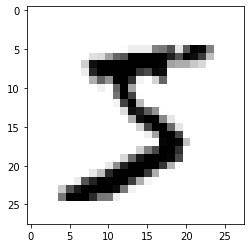

In [7]:
plt.imshow(X[0].reshape(28,28), cmap=plt.cm.gray_r)

In [8]:
# 学習データとテストデータに分ける
X_train = X[0:60000,0:784]
X_test = X[60000:70000,0:784]
y_train = y[0:60000]
y_test = y[60000:70000]

In [9]:
X_train.shape

(60000, 784)

In [12]:
# k-近傍法 (k-nearest neighbor) とは
# http://educationhub-e33695c0-835b-11eb-8e80-138dce1c124f.s3-website-us-east-1.amazonaws.com/chapter4/content1.html

# k-近傍法は、分類したいデータに似ている既存のデータをk個見て、そのk個のなかで最も多いラベルを多数決的に採用する方法です。似ている似ていないの判断基準が必要ですが、単純なものとしてはデータ間のユークリッド距離を使います。既存のデータが多い場合、最も近いk個を選ぶのに探索が必要で、データ分類に時間がかかります。
# わからん！
# にているかどうかの数値化は完全におまかせする、強いて言うならユークリッド数とかがあるらしい
# 精度面・パフォーマンス面では弱い、なるほど

X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier # k-近傍法
neigh = KNeighborsClassifier(n_neighbors=3) # 近い3個のデータでラベルを判断する
neigh.fit(X, y) # 与えられたデータに対して学習 近いデータを探してラベルを決めるモデル
print(neigh.predict([[1.1]])) # 未知データを推定
print(neigh.predict_proba([[0.9]]))


# わからなかったこと
# X のなかで、0.9 に近い3つの数字はどれでしょう。そのうち、0のラベルと1のラベルは何個含まれているでしょうか。
# k=3 に含まれるラベルの数の割合と、確率の関係はどういう関係でしょうか。

[0]
[[0.66666667 0.33333333]]


In [15]:
X = X_train
y = y_train
from sklearn.neighbors import KNeighborsClassifier # k-近傍法
neigh = KNeighborsClassifier(n_neighbors=3) # 近い3個のデータでラベルを判断する
neigh.fit(X, y) # 与えられたデータに対して学習 近いデータを探してラベルを決めるモデル
print(neigh.predict([X_test[0]])) # 未知データを推定
print(neigh.predict_proba([X_test[0]]))


['7']
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [17]:
print(y_test[0]) # 7だからあってる

7


In [18]:
%%time
neigh.predict(X_test[0:100])

CPU times: user 611 ms, sys: 72.2 ms, total: 684 ms
Wall time: 398 ms


array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0',
       '7', '4', '0', '1', '3', '1', '3', '4', '7', '2', '7', '1', '2',
       '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4', '6', '3',
       '5', '5', '6', '0', '4', '1', '9', '5', '7', '8', '9', '3', '7',
       '9', '6', '4', '3', '0', '7', '0', '2', '9', '1', '7', '3', '2',
       '9', '7', '7', '6', '2', '7', '8', '4', '7', '3', '6', '1', '3',
       '6', '9', '3', '1', '4', '1', '7', '6', '9'], dtype=object)

In [19]:
# [March 17, 2021, 2:28 PM] ‹30›: どうしてXは大文字で、yは小文字なのでしょうか？
# Xはベクトル、yは横軸

In [21]:
# 決定木とは
# 重さが5kg以下かどうか」「飛ぶことができるか」のようなルールでデータを振り分けていく
# 決定木は解釈可能なモデル

from sklearn import tree
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = tree.DecisionTreeClassifier() # 決定木分類 DecisionTreeClassifier
clf = clf.fit(X, y) # fit を呼び出すと与えられたデータに対して学習
print(clf.predict([[2., 2.]])) # ラベルを推定する関数は predict 
print(clf.predict_proba([[2., 2.]])) # predict_proba はラベルごとに推定の確率

[1]
[[0. 1.]]


In [22]:
from sklearn import tree
X = X_train
y = y_train
clf = tree.DecisionTreeClassifier() # 決定木分類 DecisionTreeClassifier
clf = clf.fit(X, y) # fit を呼び出すと与えられたデータに対して学習
print(clf.predict([X_test[0]])) # ラベルを推定する関数は predict 
print(clf.predict_proba([X_test[0]])) # predict_proba はラベルごとに推定の確率

['7']
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [23]:
#  100枚の画像に対する予測の時間を調べてみましょう。


%%time
neigh.predict(X_test[0:100])

CPU times: user 629 ms, sys: 60 ms, total: 689 ms
Wall time: 399 ms


array(['7', '2', '1', '0', '4', '1', '4', '9', '5', '9', '0', '6', '9',
       '0', '1', '5', '9', '7', '3', '4', '9', '6', '6', '5', '4', '0',
       '7', '4', '0', '1', '3', '1', '3', '4', '7', '2', '7', '1', '2',
       '1', '1', '7', '4', '2', '3', '5', '1', '2', '4', '4', '6', '3',
       '5', '5', '6', '0', '4', '1', '9', '5', '7', '8', '9', '3', '7',
       '9', '6', '4', '3', '0', '7', '0', '2', '9', '1', '7', '3', '2',
       '9', '7', '7', '6', '2', '7', '8', '4', '7', '3', '6', '1', '3',
       '6', '9', '3', '1', '4', '1', '7', '6', '9'], dtype=object)

In [24]:
y_predict = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) # 精度を計算

0.8777

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict) # 混合行列

array([[ 915,    0,   10,    8,    4,   14,   14,    3,    7,    5],
       [   0, 1092,   11,    4,    1,    6,    6,    4,    9,    2],
       [  14,    6,  891,   31,   13,   10,   11,   25,   21,   10],
       [   9,    8,   26,  862,    9,   43,    2,    8,   21,   22],
       [   9,    5,    7,    6,  856,    9,   14,   12,   16,   48],
       [  13,    8,    1,   43,    8,  739,   27,    7,   26,   20],
       [  18,    3,   12,    9,   16,   16,  855,    3,   23,    3],
       [   2,   11,   25,   18,   10,    4,    0,  927,    8,   23],
       [  14,    4,   29,   40,   26,   24,   15,   11,  780,   31],
       [  15,    4,    9,   21,   37,   13,    7,   23,   20,  860]])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X,y)
print(clf.predict([X_test[0]])) # ラベルを推定する関数は predict 
print(clf.predict_proba([X_test[0]])) # predict_proba はラベルごとに推定の確率

['7']
[[0.07366002 0.07020383 0.07738265 0.09966773 0.10457274 0.08100815
  0.06109309 0.25417061 0.05409003 0.12415116]]


In [31]:
# Random Forest を MNIST に適用して、精度を評価してみましょう。
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict) # 精度を計算

0.6364

In [32]:
# 決定木のほうがよかった 0.8777


In [33]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [38]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10) # 入力から掛け算と足し算を行う Dense Layer と呼びます。10は出力数を表します。
])

# ニューラルネットワークで学習するときに、予測値と正解値の誤差を計算する式
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# 誤差を使ってどのように学習するかの方法 adam
# 習時にあわせて表示する評価指標です。accuracy は精度です。
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5 )

# WARNING:tensorflow:From /home/ec2-user/anaconda3/envs/tensorflow_p36/cpu/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
#Instructions for updating:
#If using Keras pass *_constraint arguments to layers.
#Train on 60000 samples
#WARNING:tensorflow:OMP_NUM_THREADS is no longer used by the default Keras config. To configure the number of threads, use tf.config.threading APIs.

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 9.6504 - acc: 0.8405
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 6.1448 - acc: 0.8787
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.6601 - acc: 0.8832
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.5256 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.3397 - acc: 0.8884
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.2952 - acc: 0.8876
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.3612 - acc: 0.8884
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.2210 - acc: 0.8898
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 5.2620 - acc: 0.8893
Epoch 10/10
60000/60000 [==============================] - 

In [39]:
predictions = model.predict(X_test)
predictions

array([[-108.550415 , -409.63553  ,  -64.443924 , ...,  243.56833  ,
          33.62127  ,  121.634346 ],
       [  76.15679  ,   63.120373 ,  430.9449   , ..., -871.63904  ,
         169.12349  , -514.182    ],
       [-237.41331  ,  137.28754  ,   57.0993   , ...,  -58.262165 ,
          46.01     ,   -0.9050559],
       ...,
       [-345.55084  , -174.94257  ,  -25.418144 , ...,  116.41401  ,
         132.63293  ,  157.26404  ],
       [-233.63164  ,  -11.743449 ,  -61.618683 , ...,  -25.62085  ,
         245.4998   ,  -47.749252 ],
       [ -49.640804 , -317.44757  ,  169.96494  , ..., -384.14563  ,
         -21.864725 , -176.35027  ]], dtype=float32)

In [40]:
#  確率を得るためには softmax という関数をかける
from scipy.special import softmax
probability = softmax(predictions, axis = 1)
probability[0]

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 6.359663e-23,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 0.000000e+00], dtype=float32)

In [41]:
import numpy as np
np.argmax(probability[0])

7

In [42]:
y_predict = np.argmax(probability, axis=1)
y_predict = y_predict.astype(str)

In [43]:
model.evaluate(X_test, y_test, verbose=2)

10000/10000 - 1s - loss: 5.3950 - acc: 0.9001


[5.39496651128116, 0.9001]

In [45]:
# 畳み込みを行うと画像の輪郭などを取り出すことができるので、どういう形をしているか把握するのに有用だった
# 畳み込みニューラルネットワーク

import tensorflow as tf
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential([
    #   Reshape を使って 28x28に戻して
    tf.keras.layers.Reshape(input_shape),
    #  畳み込みは Conv2D という関数で実行可能
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 211us/sample - loss: 1.0445 - acc: 0.9382
Epoch 2/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.0801 - acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 12s 199us/sample - loss: 0.0651 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 12s 200us/sample - loss: 0.0589 - acc: 0.9817
Epoch 5/5
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0426 - acc: 0.9873


In [46]:
# カラー 、R (赤)、G (緑)、B(青) の3色の強さ
(X_train_cl, y_train_cl), (X_test_cl,y_test_cl) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 17s 0us/step


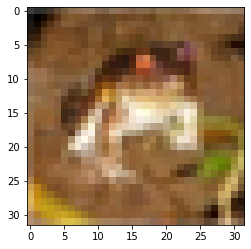

In [48]:
plt.imshow(X_train_cl[0])

In [50]:
print(y_train_cl[0])

[6]


In [51]:
X_train_cl = X_train_cl[:10000].astype(float)
y_train_cl = y_train_cl[:10000]

In [56]:
X_train_cl[0].shape

(32, 32, 3)

In [59]:
import tensorflow as tf

input_shape = (28, 28, 1)
model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(input_shape),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 262us/sample - loss: 0.8146 - acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0730 - acc: 0.9778
Epoch 3/5
60000/60000 [==============================] - 13s 209us/sample - loss: 0.0591 - acc: 0.9815
Epoch 4/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0528 - acc: 0.9837
Epoch 5/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0375 - acc: 0.9886


In [60]:
# ラベルのユニーク
import numpy as np
np.unique(y_train, return_counts=True)

set(y)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [61]:
model.evaluate(X_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.1700 - acc: 0.9721


[0.17003828730197285, 0.9721]